#### Importing the Libraries 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#### Importing the dataset

In [92]:
data = pd.read_csv('car data.csv')

In [93]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### Exploring the basic information in Dataset

In [94]:
data.shape

(301, 9)

In [95]:
data.size

2709

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [97]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [98]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

#### Extracting the categorical features

In [99]:
data.select_dtypes(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual
...,...,...,...,...
296,city,Diesel,Dealer,Manual
297,brio,Petrol,Dealer,Manual
298,city,Petrol,Dealer,Manual
299,city,Diesel,Dealer,Manual


* Here the Owner feature is also considered as Categorical feature 

+ Extracting the Unique values of all the categorical features

In [100]:
cat_columns = list(data.select_dtypes(include='object').columns)
cat_columns.remove('Car_Name')
#print (cat_columns)
# print(type(cat_columns))

for i in cat_columns:
    #print (i)
    print ('In',i,'Fearute we have -->',data[i].unique(),',Unique values')

print ('In Owner Fearute we have -->',data['Owner'].unique(),',Unique values')

In Fuel_Type Fearute we have --> ['Petrol' 'Diesel' 'CNG'] ,Unique values
In Seller_Type Fearute we have --> ['Dealer' 'Individual'] ,Unique values
In Transmission Fearute we have --> ['Manual' 'Automatic'] ,Unique values
In Owner Fearute we have --> [0 1 3] ,Unique values


#### Checking for the Null values

In [101]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [102]:
final_data = data[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [103]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [104]:
#final_data.head()

##### Creating a new feature "Age of car" using 'current_year' and 'Year'

In [105]:
#final_data['Current_year'] = 2020
#final_data['Age of car'] = final_data['Current_year'] -  final_data['Year']

In [106]:
final_data['Age of car'] = 2020 -  final_data['Year']

In [107]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


#### Removing the 'Year' column 

In [108]:
final_data.drop('Year',axis=1,inplace=True)

In [109]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


#### Converting the categorical values into Numerical Using Pandas get_dummies

In [110]:
pd.get_dummies(final_data['Fuel_Type'])
Num_FuelType = pd.get_dummies(final_data['Fuel_Type'],drop_first=True)

print (type(Num_FuelType))

print (Num_FuelType)

<class 'pandas.core.frame.DataFrame'>
     Diesel  Petrol
0         0       1
1         1       0
2         0       1
3         0       1
4         1       0
..      ...     ...
296       1       0
297       0       1
298       0       1
299       1       0
300       0       1

[301 rows x 2 columns]


In [111]:
final_data = pd.concat([final_data,Num_FuelType],axis=1)

In [112]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of car,Diesel,Petrol
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0


In [113]:
pd.get_dummies(final_data['Seller_Type'])
Num_Seller_Type = pd.get_dummies(final_data['Seller_Type'],drop_first=True)

print (type(Num_Seller_Type))

print (Num_Seller_Type)

<class 'pandas.core.frame.DataFrame'>
     Individual
0             0
1             0
2             0
3             0
4             0
..          ...
296           0
297           0
298           0
299           0
300           0

[301 rows x 1 columns]


In [114]:
final_data['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [115]:
final_data = pd.concat([final_data,Num_Seller_Type],axis=1)

In [116]:
pd.get_dummies(final_data['Transmission'])
Num_Transmission = pd.get_dummies(final_data['Transmission'],drop_first =True)

print (type(Num_Transmission))

print (Num_Transmission)

<class 'pandas.core.frame.DataFrame'>
     Manual
0         1
1         1
2         1
3         1
4         1
..      ...
296       1
297       1
298       1
299       1
300       1

[301 rows x 1 columns]


In [117]:
final_data = pd.concat([final_data,Num_Transmission],axis=1)

In [118]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age of car,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1,0,1
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,0,1
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1,0,1
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,0,1


#### Removing the categorical features

In [119]:
final_data.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [120]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age of car,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


#### Knowing the correlation between the features

In [121]:
final_data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age of car,Diesel,Petrol,Individual,Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age of car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


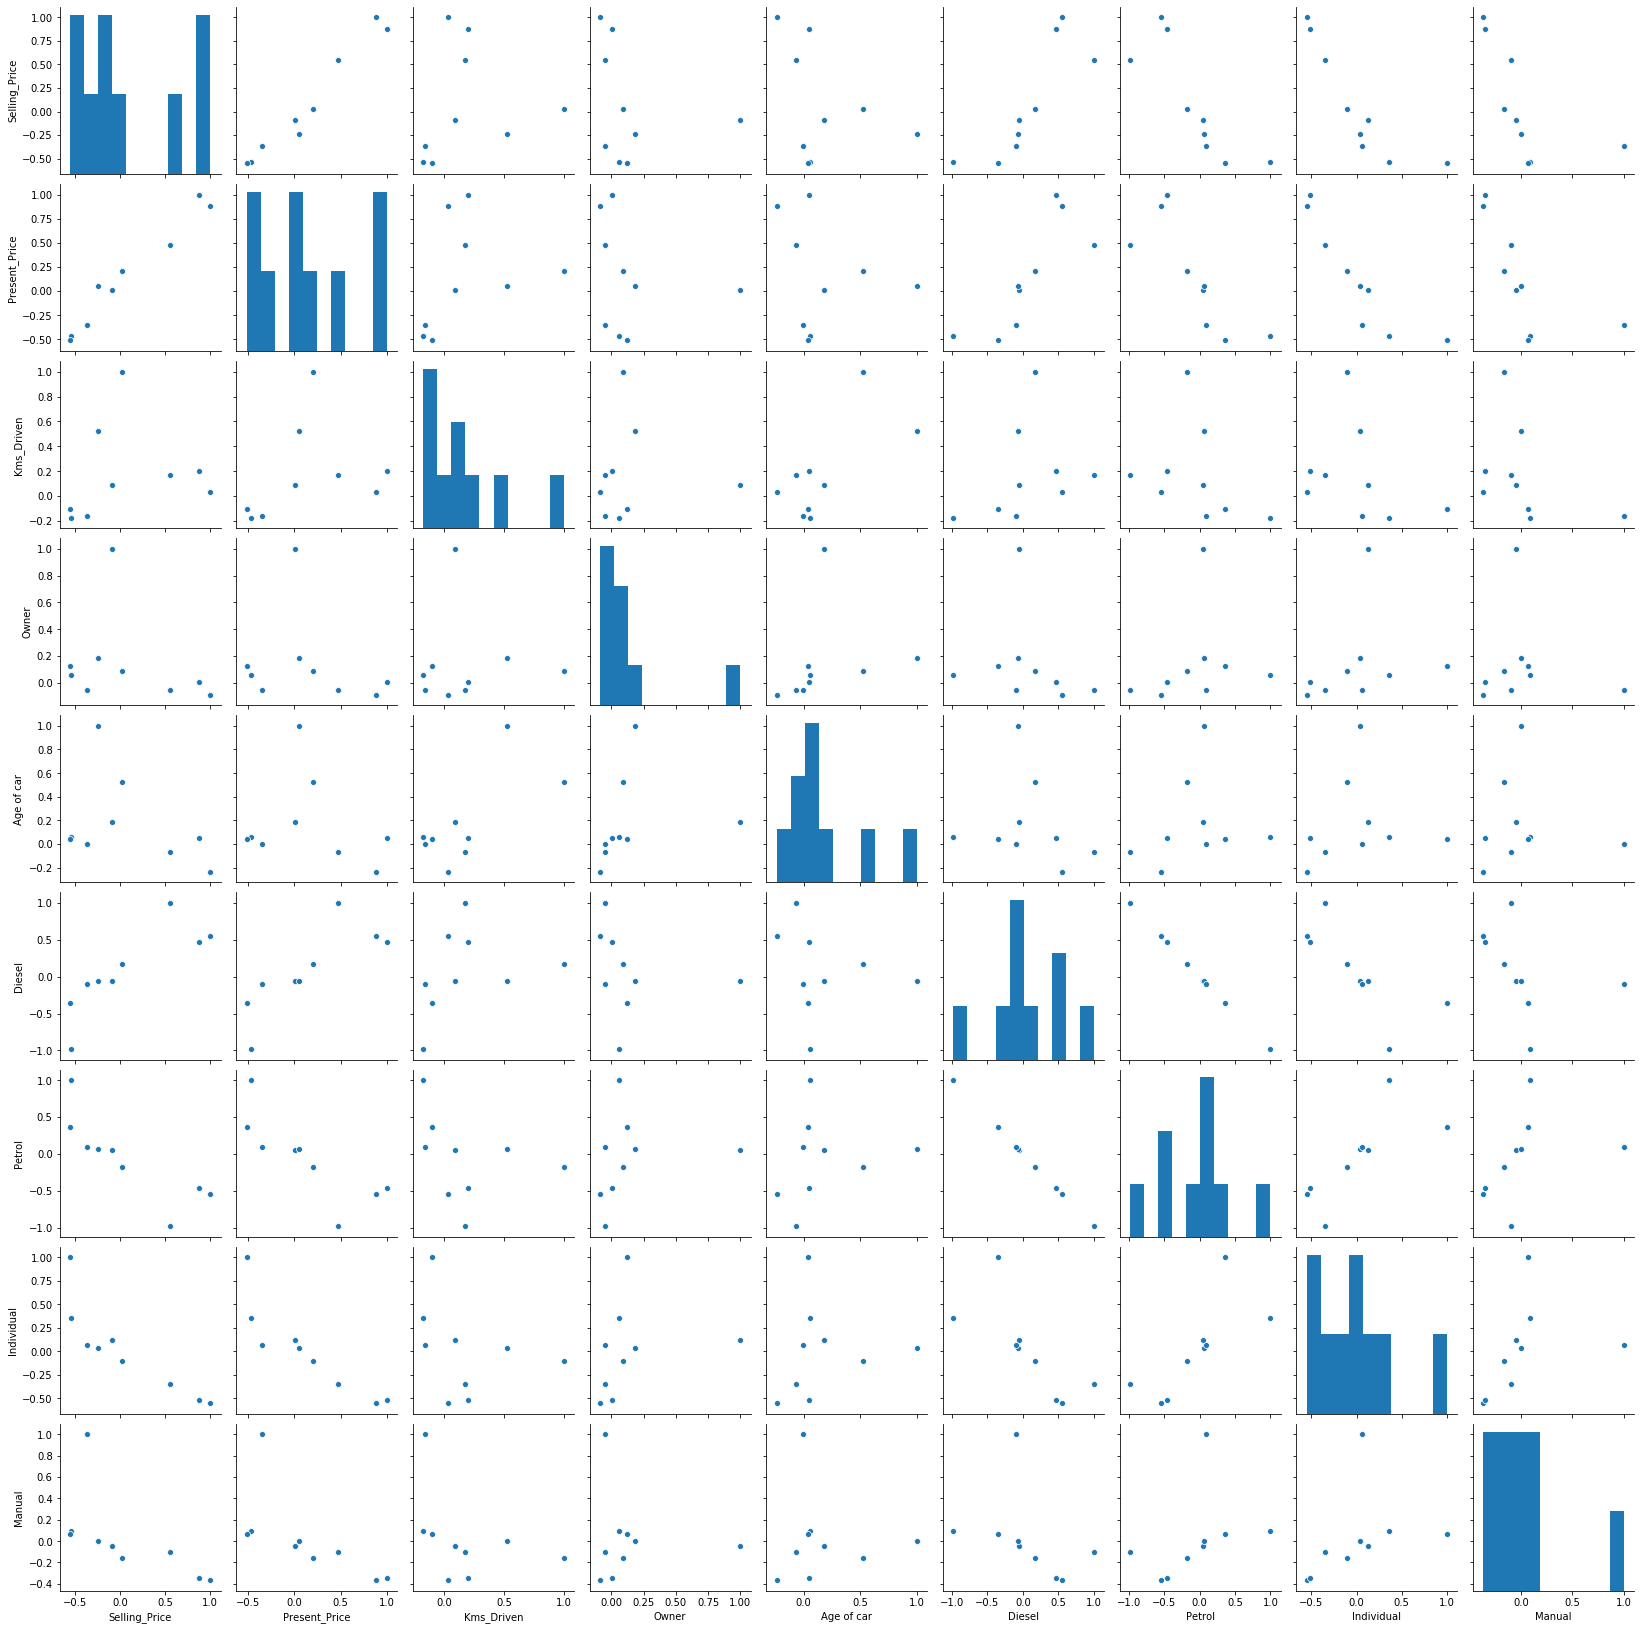

In [122]:
sns.pairplot(final_data.corr())

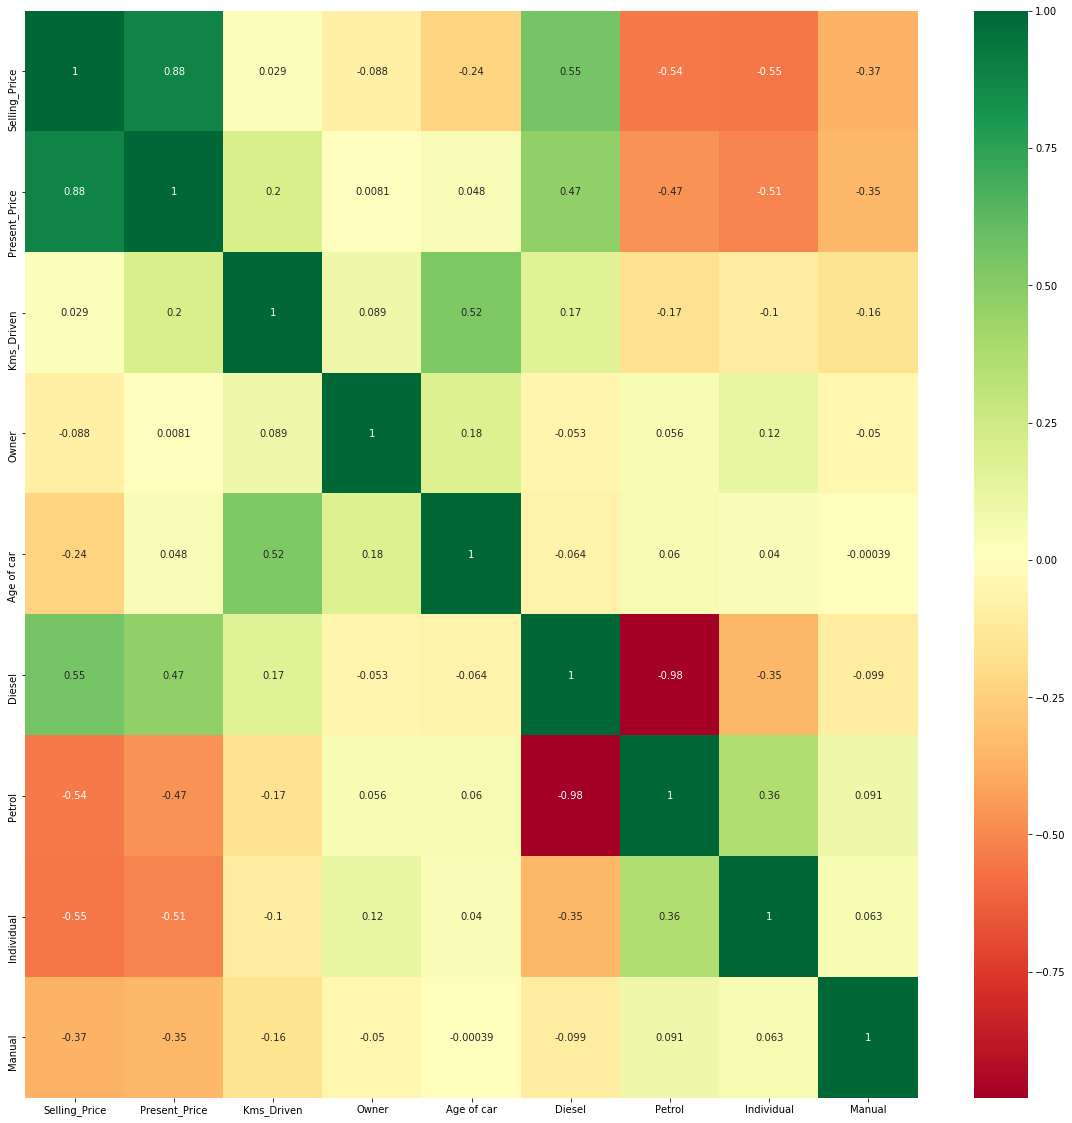

In [123]:
plt.figure(figsize=(20,20))
sns.heatmap(final_data.corr(),annot=True,cmap="RdYlGn")

In [124]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age of car,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [125]:
# Independebt and dependet Features

x = final_data.drop(['Selling_Price'],axis=1)
y = final_data['Selling_Price']

In [126]:
x.head()

,Present_Price,Kms_Driven,Owner,Age of car,Diesel,Petrol,Individual,Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [127]:
x.shape

(301, 8)

In [128]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [129]:
y.shape

(301,)

#### Spliting the data for Training and Testing

In [130]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [131]:
print (x_train.shape)

(240, 8)


In [132]:
print (y_train.shape)

(240,)


#### Creating the Model

In [133]:
from sklearn.ensemble import RandomForestRegressor
random_model = RandomForestRegressor()

In [134]:
# Selecting the Best parameters for the model

from sklearn.model_selection import RandomizedSearchCV

# for n_estimaters
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100, stop=1200, num=12)]

# for max_depth
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5, stop=30, num=6)]

# for max_features
# Number of features to consider at every split
max_features =['auto', 'sqrt']

# for min_samples_split
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# for min_samples_leaf
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [135]:
random_grid = {
                'n_estimators'     : n_estimators,
                'max_depth'        : max_depth,
                'max_features'     : max_features,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf
}

In [136]:
print (random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [137]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
random_model = RandomForestRegressor()

In [138]:
# Random search of parameters, using 3 fold cross validation, 
# searchig across 100 different combinations
hyper_model = RandomizedSearchCV(estimator = random_model, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [139]:
hyper_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   53.6s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [140]:
prediction = hyper_model.predict(x_test)

In [141]:
prediction

array([ 7.48718343,  0.55820034,  5.92833818,  2.38204009,  2.67050495,
        7.92237449,  0.42673886,  3.80518435,  3.5292671 ,  6.48112611,
       14.48215136,  6.79168313,  2.78379819,  0.57464504,  1.16448893,
        5.0374741 ,  5.56964444,  0.6495691 ,  2.65691354,  5.57459707,
        4.18627455,  4.35031969,  3.74045739,  6.89468976,  5.26917786,
        7.16841959,  0.69764611,  0.59108759,  5.15217624,  8.11571421,
        1.38584791,  0.57013447,  0.37413443,  1.1450343 ,  3.51810042,
        0.29178679,  6.90538515,  0.2605471 ,  3.67168829, 10.177053  ,
        4.56376657,  7.70268285,  5.82437762,  2.91614883,  4.4882206 ,
        0.23720744,  0.38498199,  6.78826358,  6.93222632,  0.24106009,
        5.941319  ,  5.26907955,  0.52750595,  0.69903658,  3.78006819,
        0.29579544,  0.49633294,  3.77839069,  2.83386061, 20.54651963,
        7.80755205])

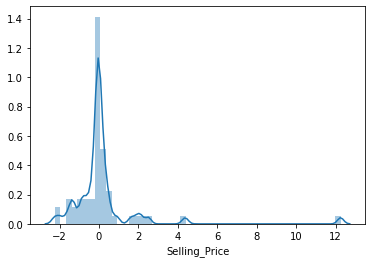

In [72]:
sns.distplot(y_test-prediction)

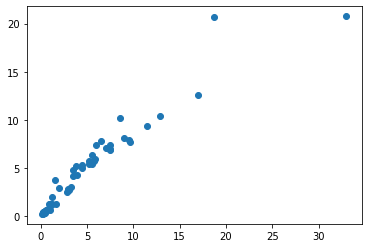

In [74]:
plt.scatter(y_test,prediction)

In [75]:
hyper_model.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [76]:
hyper_model.best_score_

-3.8083367519585196

In [86]:
hyper_model.score(x_test,y_test)

-3.472389355678301

In [80]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))


MAE: 0.7877876294984036
MSE: 3.472389355678301
RMSE: 1.863434827322464


In [143]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(hyper_model, file)

### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')